# Intro to Technical Analysis Techniques

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [6]:
aapl = pdr.get_data_yahoo('AAPL', '20181001')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,223.787323
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,225.776459
2018-10-03,233.470001,229.779999,230.050003,232.070007,28654800.0,228.523819
2018-10-04,232.350006,226.729996,230.779999,227.990005,32042000.0,224.506180
2018-10-05,228.410004,220.580002,227.960007,224.289993,33580500.0,220.862717


In [10]:
aapl['21-day'] = aapl.Close.rolling(21).mean()
aapl['63-day'] = aapl.Close.rolling(63).mean()
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,21-day,63-day
Date,,,,,,,,
2019-10-10,230.440002,227.300003,227.929993,230.089996,28253400.0,230.089996,222.093809,212.083016
2019-10-11,237.639999,232.309998,232.949997,236.210007,41698900.0,236.210007,222.718571,212.575079
2019-10-14,238.130005,234.669998,234.899994,235.869995,24106900.0,235.869995,223.533809,213.073015
2019-10-15,237.649994,234.880005,236.389999,235.320007,21840000.0,235.320007,224.268095,213.580476
2019-10-16,235.232605,233.199997,233.369995,233.954498,8333026.0,233.954498,224.899262,214.029595


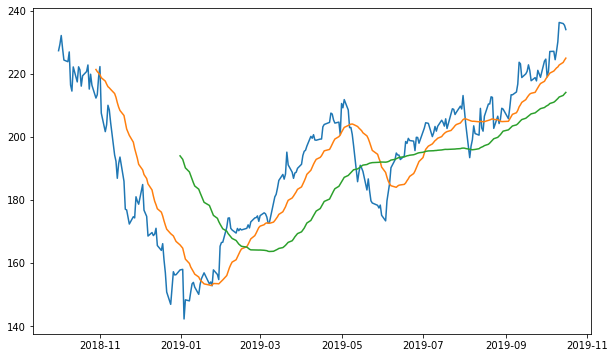

In [11]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(aapl[['Close', '21-day', '63-day']])

### Bollinger Bands - Volatility

In [12]:
aapl['std'] = aapl['Close'].rolling(21).std()

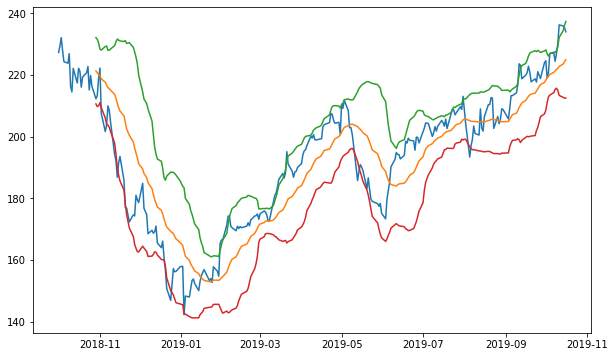

In [13]:
# the standard is 20 days
plt.plot(aapl["Close"])
plt.plot(aapl["21-day"])
plt.plot(aapl['21-day'] + 2 * aapl['std'])
plt.plot(aapl['21-day'] - 2 * aapl['std'])

### Using the ta library

https://technical-analysis-library-in-python.readthedocs.io/en/latest/

In [14]:
import ta

### RSI - Volatility

In [15]:
# pip install ta
aapl['rsi'] = ta.momentum.rsi(aapl['Close'],14)

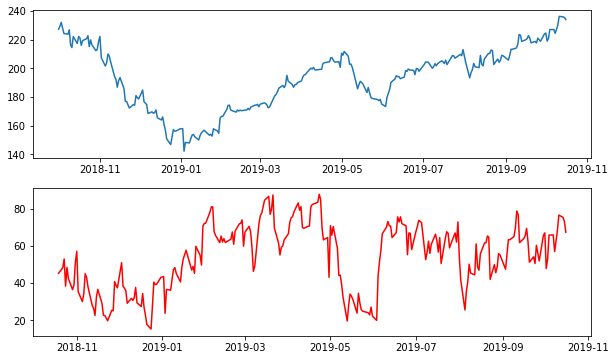

In [16]:
fig, axes = plt.subplots(2,1)
axes[0].plot(aapl.Close)
axes[1].plot(aapl.rsi, 'r')

In [18]:
help(ta.volume)

Help on module ta.volume in ta:

NAME
    ta.volume

DESCRIPTION
    .. module:: volume
       :synopsis: Volume Indicators.
    
    .. moduleauthor:: Dario Lopez Padial (Bukosabino)

FUNCTIONS
    acc_dist_index(high, low, close, volume, fillna=False)
        Accumulation/Distribution Index (ADI)
        
        Acting as leading indicator of price movements.
        
        https://en.wikipedia.org/wiki/Accumulation/distribution_index
        
        Args:
            high(pandas.Series): dataset 'High' column.
            low(pandas.Series): dataset 'Low' column.
            close(pandas.Series): dataset 'Close' column.
            volume(pandas.Series): dataset 'Volume' column.
            fillna(bool): if True, fill nan values.
        
        Returns:
            pandas.Series: New feature generated.
    
    chaikin_money_flow(high, low, close, volume, n=20, fillna=False)
        Chaikin Money Flow (CMF)
        
        It measures the amount of Money Flow Volume over a sp